# How Large Are Transitory and Permanent Shocks?

This notebook illustrates a simple method for measuring the size of transitory and permanent shocks for a set of households whose incomes are subject to those kinds of shocks

In [1]:
# This cell has a bit of initial setup.
# You should substitute whatever setup you might need to address the questions below
import matplotlib.pyplot as plt
import numpy as np
import HARK
from copy import deepcopy
from HARK.utilities import plot_funcs

# Additionally
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
import statsmodels.api as sm

## Income Process With Transitory and Permanent Shocks

Assume that a household observes two income shocks at the beginning of each period.  Permanent income would be expected to grow by a factor $\Gamma_{t+1}$ in the absence of any shock (this could capture a life cycle profile of income, for example) but that growth is modified by a shock, $\Psi_{t+1}$:
\begin{align}
 P_{t+1} & = \Gamma_{t+1} P_{t}\Psi_{t+1}
\end{align}
whose expected (mean) value is $\mathbb{E}_{t}[\Psi_{t+1}]=1$.  Actual income received $Y$ is equal to permanent income $P$ multiplied by a transitory shock $\Theta$:
\begin{align}
 Y_{t+1} & = P_{t+1}\Theta_{t+1}
\end{align}
where again $\mathbb{E}_{t}[\Theta_{t+1}] = 1$.

For present purposes, we assume that the transitory and permanent shocks are independent.  The transitory shock has two components: A probability $\wp$ that the consumer is unemployed, in which case $\theta^{u}=\theta$, and a probability $(1-\wp)$ of a shock that is a lognormal with a mean chosen so that $\mathbb{E}_{t}[\theta_{t+n}]=1$.

Using lower case variables for the logarithms of all variables above, the process can be written more conveniently as:

\begin{align}
 p_{t+1} & = \gamma_{t+1} + p_{t} + \psi_{t+1}
\\ y_{t+1} & = p_{t+1} + \theta_{t+1}
\end{align}
where both lower-case Greek shocks are now white noise IID variables.

### Removing the Predictable Components

In actual microeconomic data, the first step is to remove the predictable components of income growth (since we are interested here in the shocks).  This is traditionally done by estimating a model of income growth.  Restricting the sample to people of working age, one simply performs a regression:

\begin{align}
 y_{i} & = X_{i} \zeta + \epsilon_{i}
\end{align}

where person $i$ is characterized by observable variables $X_{i}$ in a given period, where $X$ includes usual variables like age, education, and other characteristics known to the person well in advance of the realization of income in the period in question.  The result is an estimate $\hat{\zeta}$ of the consequences of the exogenous variables $X$.  The predictable component of income growth is then obained from
\begin{align}
 \hat{\gamma}_{t,i} & = X_{t,i} \hat{\zeta}
\end{align}

### Estimating The Variances 

It will be notationally convenient to continue using the same variable names as before, where from here on out they are interpreted as having had the predictable component of income growth removed.  That is, we will assume that we now have data generated by a process like:
\begin{align}
 p_{t+1} & = p_{t} + \psi_{t+1}
\\ y_{t+1} & = p_{t+1} + \theta_{t+1}
\end{align}

We can calculate a $d-$period difference in income as
\begin{align}
  y_{t+d} - y_{t} & = p_{t+d} - p_{t} + \theta_{t+d} - \theta_{t}
\\ & =   \psi_{t+1} + \psi_{t+2} + ... \psi_{t+d} + \theta_{t+d} - \theta_{t}
\end{align}
and then we simply take the square of this to obtain:
\begin{align}
  (\Delta^{d}y)^{2} & = \left(\psi_{t+1} + \psi_{t+2} + ... \psi_{t+d} + \theta_{t+d} - \theta_{t}\right)^{2}
\end{align}
but since we have assumed that the $\psi$ and $\theta$ shocks are mutually and serially uncorrelated, the expectation of this simply becomes 
\begin{align}
  \mathbb{E}_{t}[(\Delta^{d}y)^{2}] & = \mathbb{E}_{t}[\psi_{t+1}^{2} + ... + \psi_{t+d}^{2} + 2 \theta^{2}]
\\ & = d \sigma^{2}_{\psi} + 2 \sigma^{2}_\theta
\end{align}

This is an object that we can compute for any individual household.  We can then obtain an estimate of the two objects in question by calculating a set of squared differences in log income for all our households, and performing a very simple regression:

\begin{align}
  (\Delta^{d}y)^{2}_{i} & = \eta_{0} + d \eta_{1}
\end{align}
where $\nu_{1} = \sigma^{2}_{\psi}$ and $\nu_{0} = 2 \sigma^{2}_{\theta}$.


### The Intuition

The intuition for this approach is pretty compelling:  Essentially, the consequence of permanent shocks is to make people get more and more different from each other continually over time as they accumulate permanent shocks.  So the degree to which the _changes_ in income keep increasing and increasing as time passes is a direct measure of the magnitude of the permanent shocks that are causing that divergence.  

If there were no permanent shocks, then in year $t$ and in year $t+d$ the person will have experienced transitory shocks $\theta_{t}$ and $\theta_{t+d}$.  But the very _definition_ of "transitory" means that none of the shocks in intervening periods has any consequence for the difference in incomes between $t$ and $t+d$.  Only the two transitory shocks of those two years contribute.

### Two Small Caveats

#### Time Aggregation

If our data are measured at an annual frequency but income shocks can happen at any time during the year, then even if all shocks were permanent, an exercise like the one above, if conducted using annual data and using only three years of data (so, differences $\Delta^{1}$ and $\Delta^{2}$), would generate a biased answer due to the "time aggregation" problem ([Holbrook Working (1960)](doi:10.2307/1907574Copy); [Edmund Crawley (2020)](https://doi.org/10.1016/j.econlet.2020.108998).  Briefly, imagine two people who are identical up to the beginning of year $t$.  And they both experience identically sized shocks to permanent income in period $t$ -- but one experiences the shock on January 1, and the other on October 1.  Thus, the first person's income is boosted for the entire year by the shock; for this person, the method above would work.  But for the second person, only (1/4) of the year was spent earning the permanently higher level of income.  They would show some increment of income for the year $t$, but then would spend all of year $t+1$ at the higher level of income.  So, there would be a small change in income in year $t$ followed by a (predictable) larger increase in year $t+1$ -- which _looks like_ serial correlation in income growth.  In particular, this problem would manifest itself in a spurious first-order moving average (MA) component in a time series estimation that allowed for such a component.

It can be shown that the problem goes away if only spans of years 2 or more are used.  That is, we have no problem if we use $\Delta^{3}$, $\Delta^{4}$, etc.  Indeed, it can be shown that the magnitude of the permanent shock can be estimated even when there is a _true_ MA component to the transitory shock, simply by restricting the data used to those that span intervals long enough for the MA component to have disappeared.

#### A Lower Bound on $p$

The process above assumes that permanent income can wander to arbitrarily large or small values.  But in practice, all countries that are sophisticated enough to have household datasets of the kind needed to measure these shocks, also have some degree of social insurance that prevents income from falling below some "necessity" level of income.  It can be shown that, if measured income is bounded below (cannot fall too far), then the estimated magnitude of the permanent shocks will be biased down and estimates of the magnitude of the transitory shock will be biased up.

# PROBLEM: Simulate and Estimate 

The $\texttt{ConsIndShockModel}$ consumer type is hard-wired to experience permanent and transitory income shocks exactly like those described above.  

1. Construct a population of `ConsIndShockModel` consumers and simulate them
   * Use the default parameter values 
1. Use the method above to calculate simulated 'empirical' estimates of the magnitude of the shocks
   * Experiment to determine how large a population of consumers, and how long a span of time, you need to correctly recover the 'true' parameter values for the income process

#### 1. Construct a population of ConsIndShockModel consumers and simulate them

In [2]:
# a) Take parameters from Nondurables:
# Choose some calibrated parameters that roughly match steady state 
init_infinite = {
    "CRRA":1.0,                    # Coefficient of relative risk aversion 
    "Rfree":1.01/(1.0 - 1.0/240.0), # Survival probability,
    "PermGroFac":[1.000**0.25], # Permanent income growth factor (no perm growth),
    "PermGroFacAgg":1.0,
    "BoroCnstArt":0.0,
    "CubicBool":False,
    "vFuncBool":False,
    "PermShkStd":[(0.01*4/11)**0.5],  # Standard deviation of permanent shocks to income
    "PermShkCount":7,  # Number of points in permanent income shock grid
    "TranShkStd":[(0.01*4)**0.5],  # Standard deviation of transitory shocks to income,
    "TranShkCount":5,  # Number of points in transitory income shock grid
    "UnempPrb":0.07,  # Probability of unemployment while working
    "IncUnemp":0.15,  # Unemployment benefit replacement rate
    "UnempPrbRet":0.07,
    "IncUnempRet":0.15,
    "aXtraMin":0.00001,  # Minimum end-of-period assets in grid
    "aXtraMax":20,  # Maximum end-of-period assets in grid
    "aXtraCount":20,  # Number of points in assets grid,
    "aXtraExtra":[None],
    "aXtraNestFac":3,  # Number of times to 'exponentially nest' when constructing assets grid
    "LivPrb":[1.0 - 1.0/240.0],  # Survival probability
    "DiscFac":0.97,             # Default intertemporal discount factor, # dummy value, will be overwritten
    "cycles":0,
    "T_cycle":1,
    "T_retire":0,
    'T_sim':2000,  # Number of periods to simulate (idiosyncratic shocks model, perpetual youth)
    'T_age':1000,
    'IndL': 10.0/9.0,  # Labor supply per individual (constant),
    'aNrmInitMean':np.log(0.00001),
    'aNrmInitStd':0.0,
    'pLvlInitMean':0.0,
    'pLvlInitStd':0.0,
    'AgentCount':10000,
}

In [3]:
# b) Create Consumers
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
BaselineType = IndShockConsumerType(**init_infinite)
T_sim = 800
AgentCount = 500
BaselineType.T_sim = T_sim
BaselineType.AgentCount = AgentCount

In [4]:
# c) Solve
BaselineType.solve(verbose=False)
# d) Simulate
BaselineType.initialize_sim()
BaselineType.simulate()

GPFRaw                 = 0.983799 
GPFNrm                 = 0.987147 
GPFAggLivPrb           = 0.979700 
Thorn = APF            = 0.983799 
PermGroFacAdj          = 0.996609 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.965958 
WRPF                   = 0.067617 
DiscFacGPFNrmMax       = 0.982630 
DiscFacGPFAggLivPrbMax = 0.990099 


{}

#### 2. Use the method above to calculate simulated 'empirical' estimates of the magnitude of the shocks

In [5]:
# a) Calculate the d-period difference of income for each consumer
# We want to track total income for each individual in each period
BaselineType.track_vars = ['pLvl']# ['aNrm','mNrm','cNrm','pLvl']
BaselineType.initialize_sim()
BaselineType.simulate()

# update_income_process()

{'pLvl': array([[0.90780776, 1.0475462 , 1.09832058, ..., 1.09832058, 0.90780776,
         0.9762763 ],
        [0.86352322, 1.069155  , 1.15054155, ..., 1.2063081 , 0.99706395,
         1.07226436],
        [0.86197146, 0.9705872 , 1.09441601, ..., 1.26366347, 1.04447055,
         1.07033749],
        ...,
        [0.48862799, 1.47992967, 1.75066017, ..., 1.17311538, 1.02027383,
         0.86194519],
        [0.51186039, 1.51045768, 1.78677281, ..., 1.11588864, 0.99606916,
         0.81989791],
        [0.5621868 , 1.3712052 , 1.69961073, ..., 1.08941564, 0.99427921,
         0.77990177]])}

In [6]:
# For each agent, take 1st, 2nd, .... T_sim differences

In [7]:
# Take the difference within each array and square it
Inc = np.log(BaselineType.history['pLvl'])
Inc.shape # period x agent count
Y = []
D = []


for i in range(AgentCount): # For each agent
    for n in range(T_sim-1): # t-1 differences
        for j in range(T_sim - n - 1): # period
            Y_aux = (Inc[j+n+1, i] - Inc[j , i])**2
            Y.append(Y_aux)
            D_aux = n + 1
            D.append(D_aux)

In [8]:
X = D
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

array([0.39751355, 0.00158698])

In [9]:
sd_psi = np.sqrt(results.params[1])
sd_theta = np.sqrt(results.params[0]/2)

print(sd_psi, sd_theta)

0.039836885365626074 0.4458214586851734


In [10]:
# Compare with true parameters:
print(init_infinite['PermShkStd'], init_infinite['TranShkStd'])

[0.06030226891555272] [0.2]


In [11]:
def Regression(Type,T_sim,AgentCount):
    Type = IndShockConsumerType(**init_infinite)
    # a)
    Type.T_sim = T_sim
    Type.AgentCount = AgentCount
    
    # b) Solve
    Type.solve(verbose=False)
    # c) Simulate
    Type.track_vars = ['pLvl']# ['aNrm','mNrm','cNrm','pLvl']
    Type.initialize_sim()
    Type.simulate()
    
    # Calculate variables
    # Take the difference within each array and square it
    Inc = np.log(Type.history['pLvl'])
    Y = []
    D = []

    for i in range(AgentCount): # For each agent
        for n in range(T_sim-1): # t-1 differences
            for j in range(T_sim - n - 1): # period
                Y_aux = (Inc[j+n+1, i] - Inc[j , i])**2
                Y.append(Y_aux)
                D_aux = n + 1
                D.append(D_aux)
                
    X = D
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    results.params
    
    sd_psi = np.sqrt(results.params[1])
    sd_theta = np.sqrt(results.params[0]/2)

    diff_sd_psi = init_infinite['PermShkStd'] - sd_psi
    diff_sd_theta = init_infinite['TranShkStd'] - sd_theta
    
    return  {"sd_psi": sd_psi,
            "sd_theta": sd_theta, 
             "diff_sd_psi": diff_sd_psi, 
             "diff_sd_theta": diff_sd_theta}

In [12]:
# Let's try it
BaselineType = IndShockConsumerType(**init_infinite)
# for
T = [10, 100, 200, 300, 400, 800]
A = [50, 100, 200, 300, 400, 500]

D_sd_psi_time = []
D_sd_theta_time = []

for i in T:
    stats_est= Regression(BaselineType, i, 300) # baseline with 300 agents
    D_sd_psi_time.append(stats_est['diff_sd_psi']) 
    D_sd_theta_time.append(stats_est['diff_sd_theta'])

# agents
D_sd_psi_agents = []
D_sd_theta_agents = []

for i in A:
    stats_est= Regression(BaselineType, 300, i) # baseline with 300 periods
    D_sd_psi_agents.append(stats_est['diff_sd_psi']) 
    D_sd_theta_agents.append(stats_est['diff_sd_theta'])

GPFRaw                 = 0.983799 
GPFNrm                 = 0.987147 
GPFAggLivPrb           = 0.979700 
Thorn = APF            = 0.983799 
PermGroFacAdj          = 0.996609 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.965958 
WRPF                   = 0.067617 
DiscFacGPFNrmMax       = 0.982630 
DiscFacGPFAggLivPrbMax = 0.990099 
GPFRaw                 = 0.983799 
GPFNrm                 = 0.987147 
GPFAggLivPrb           = 0.979700 
Thorn = APF            = 0.983799 
PermGroFacAdj          = 0.996609 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.965958 
WRPF                   = 0.067617 
DiscFacGPFNrmMax       = 0.982630 
DiscFacGPFAggLivPrbMax = 0.990099 
GPFRaw                 = 0.983799 
GPFNrm                 = 0.987147 
GPFAggLivPrb           = 0.979700 
Thorn = APF            = 0.983799 
PermGroFacAdj          = 0.996609 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.965958 
WRPF                   = 0.067617 
DiscFacGPFNrmMax    

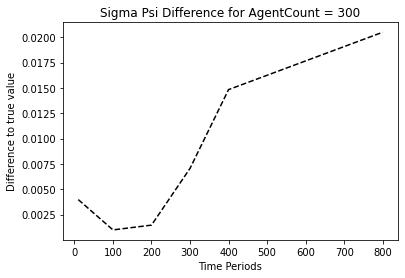

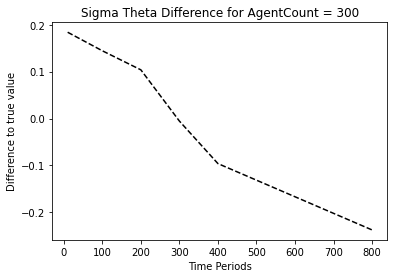

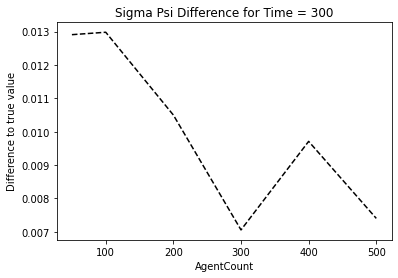

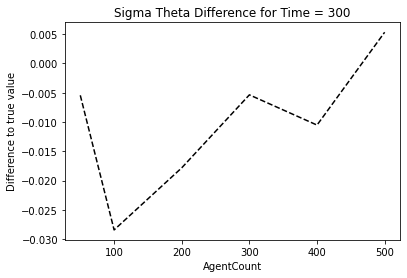

In [14]:
# let's plot them
# persistent and time
plt.plot(T,D_sd_psi_time,'--k')
plt.title('Sigma Psi Difference for AgentCount = 300')
plt.xlabel('Time Periods')
plt.ylabel('Difference to true value')
plt.show(block=False)

plt.plot(T,D_sd_theta_time,'--k')
plt.title('Sigma Theta Difference for AgentCount = 300')
plt.xlabel('Time Periods')
plt.ylabel('Difference to true value')
plt.show(block=False)

plt.plot(A,D_sd_psi_agents,'--k')
plt.title('Sigma Psi Difference for Time = 300')
plt.xlabel('AgentCount')
plt.ylabel('Difference to true value')
plt.show(block=False)

plt.plot(A,D_sd_theta_agents,'--k')
plt.title('Sigma Theta Difference for Time = 300')
plt.xlabel('AgentCount')
plt.ylabel('Difference to true value')
plt.show(block=False)

### Discussion
From this exercise we can see that the regression may be simple, but is very comuputational intensive if we use a larger number of periods and/or agents. Unfortunately, we need a large number of both to receive estimates which are close to the true values. Here, given a sufficient large number of time periods, an increase in the agent count is particularly crucial to reduce the difference between estimated and true parameter.